In [66]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [67]:
df= pd.read_csv('TCC.csv')

In [68]:
df = df.drop(columns=["customerID"])

In [69]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [70]:
print(df.apply(lambda x: x.unique()))

gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies                        [No, Yes, No internet service]
Contract            

In [71]:
df[df["MonthlyCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [72]:
df[df["tenure"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [73]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [74]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0.0)

In [75]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [76]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [77]:
print(df["TotalCharges"].dtype)
print(df["TotalCharges"].isna().sum())  

float64
0


In [78]:
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [79]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [80]:
# Numerical Features Analysis

In [81]:
sns.set_theme(style="whitegrid")

In [82]:
#histograms
def histplot(df,column_name):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column_name],color="#FF9999",edgecolor="PINK",kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.axvline(df[column_name].mean(), color="#F7DC84",  label="Mean")
    plt.axvline(df[column_name].median(), color="LIGHTBLUE", label="Median")
    plt.legend()
    plt.show()

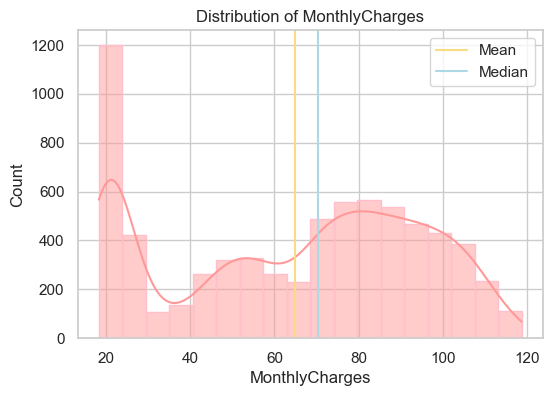

In [83]:
histplot(df,'MonthlyCharges')

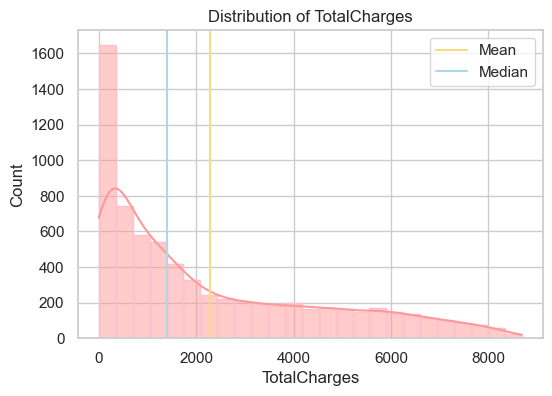

In [84]:
histplot(df,'TotalCharges')

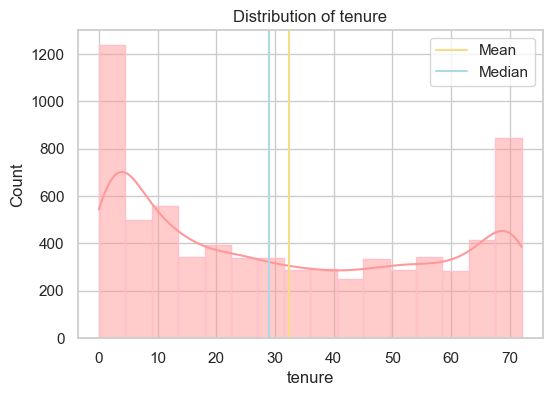

In [85]:
histplot(df,'tenure')

In [86]:
#boxplots
def boxplot(df,column_name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[column_name],width=0.1,color="#FF9999",fliersize=5,linewidth=2)
    plt.title(f'Box Plot of {column_name}')
    sns.despine()
    plt.tight_layout()
    plt.show()


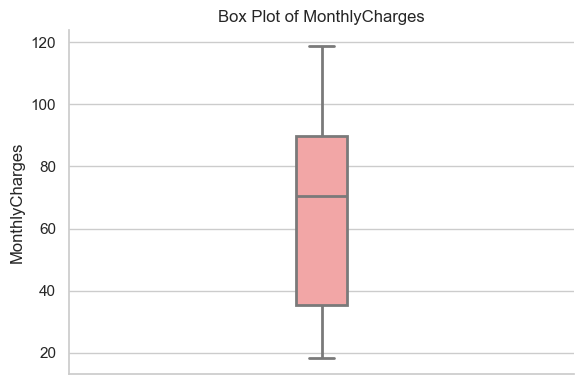

In [87]:
boxplot(df,'MonthlyCharges')

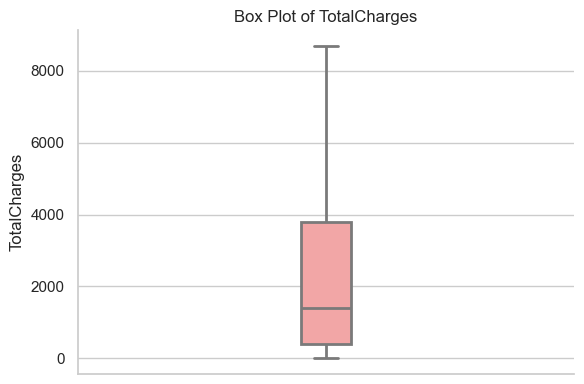

In [88]:
boxplot(df,'TotalCharges')

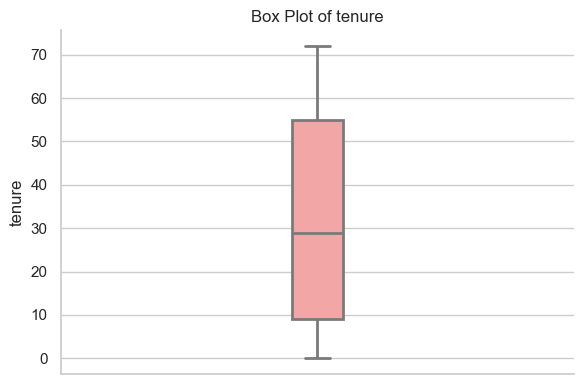

In [89]:
boxplot(df,'tenure')

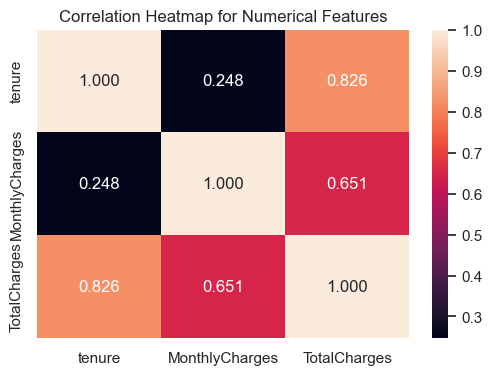

In [90]:
#correlation matrix  / heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True,fmt='.3f')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

In [91]:
# Categorical Features Analysis

In [92]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

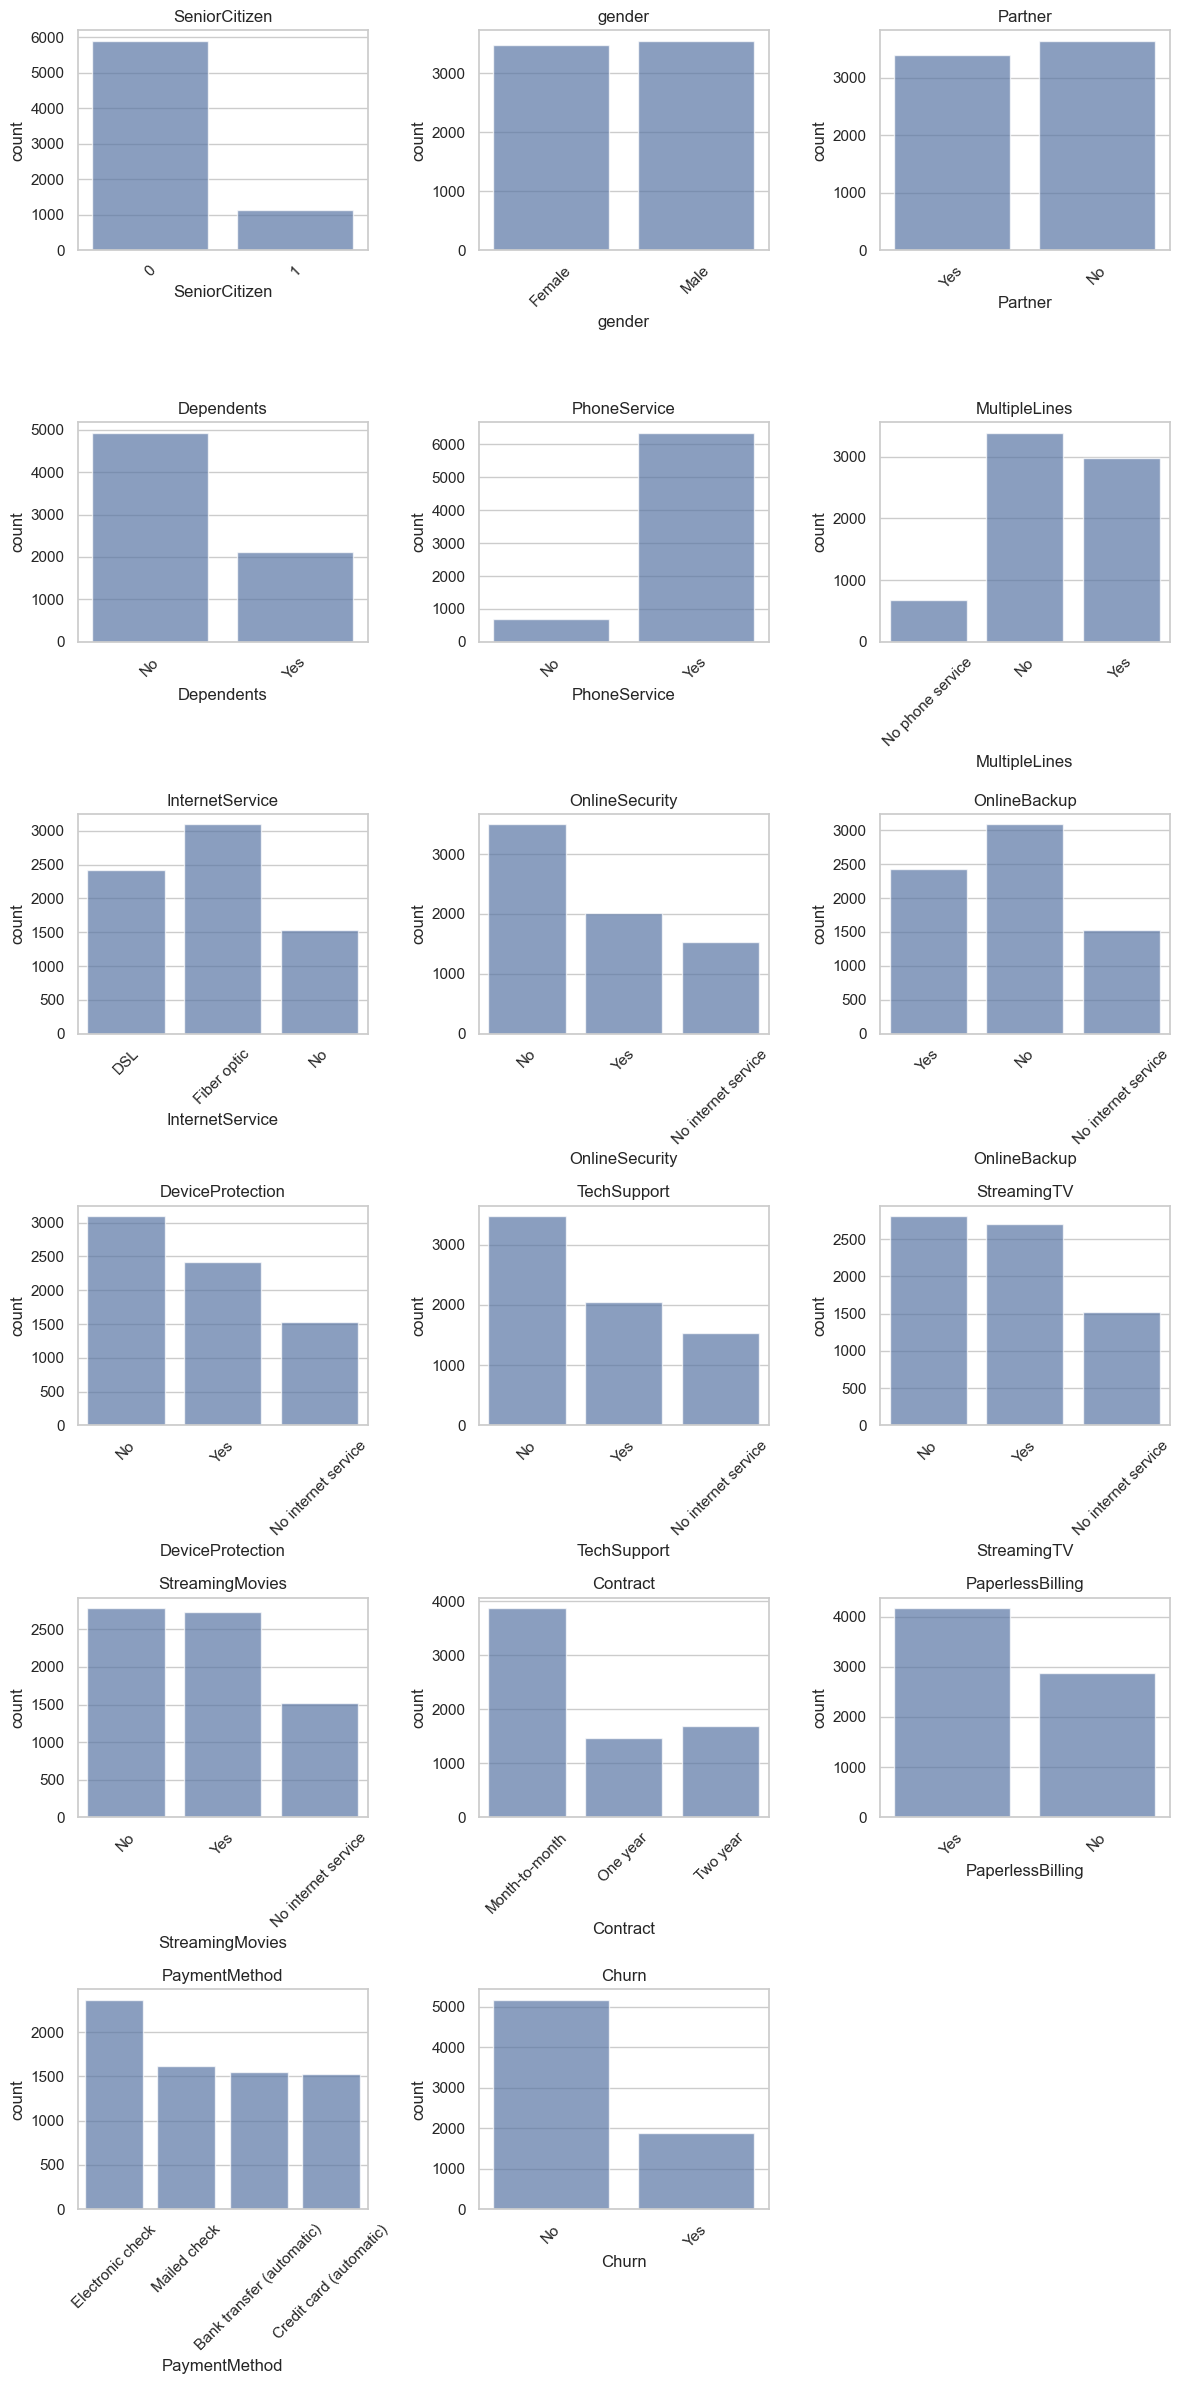

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = ['SeniorCitizen'] + cat_cols 

n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], alpha=0.7)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [94]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

C:\Users\user\AppData\Local\Temp\ipykernel_4708\2364848822.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [95]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0


In [96]:
encoded={}
for column in cat_cols:
    label_encoder=LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoded[column] = label_encoder
    
with open("encoded.pkl", "wb") as f:
  pickle.dump(encoded, f)

In [97]:
#train/test

In [98]:
X = df.drop(columns=["Churn"])
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
#oversampling using SMOTE 

In [100]:
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [101]:
print(y_train_smote.value_counts()) #churn values are now equal (not unbalanced like before)

Churn
0    4138
1    4138
Name: count, dtype: int64


In [102]:
#model training

In [103]:
crossval_scores = {}

In [110]:
models={'DecisionTree':DecisionTreeClassifier(random_state=42),
        'RandomForest':RandomForestClassifier(random_state=42),
        'LogisticRegression':LogisticRegression(random_state=42,max_iter=5000)}

In [112]:
for i, j in models.items():
    score = cross_val_score(j, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
    crossval_scores[i] = score
    print(f"{i} cross validation accuracy: {np.mean(score)}")
    print()

DecisionTree cross validation accuracy: 0.7809435614519025

RandomForest cross validation accuracy: 0.8409993140388516

LogisticRegression cross validation accuracy: 0.7927815724564706



In [114]:
crossval_scores

{'DecisionTree': array([0.69202899, 0.70574018, 0.82537764, 0.83806647, 0.84350453]),
 'RandomForest': array([0.73067633, 0.77039275, 0.90392749, 0.89969789, 0.90030211]),
 'LogisticRegression': array([0.73248792, 0.74743202, 0.82779456, 0.82054381, 0.83564955])}

In [ ]:
#Random Forest has the best accuracy

In [124]:
fittedmodel=RandomForestClassifier(random_state=42).fit(X_train_smote, y_train_smote)

In [128]:
testpredict = fittedmodel.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, testpredict))
print("Confsuion Matrix:\n", confusion_matrix(y_test, testpredict))
print("Classification Report:\n", classification_report(y_test, testpredict))

Accuracy Score:
 0.7785663591199432
Confsuion Matrix:
 [[878 158]
 [154 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

